# Связь музыки и психического состояния

Я хочу выявить, как прослушивание жанров музыки коррелирует с психическими проблемами.

[Ссылка на датасет с kaggle](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results)

## Импорт модулей

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats

## Очистка данных

In [3]:
df_uncleaned = pd.read_csv('data/mxmh_survey_results.csv', sep=',')
df_uncleaned.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [4]:
df_clear = df_uncleaned.copy()

### Удалим ненужные столбцы

In [5]:
delete_cols = ['Timestamp', 'Permissions']
df_clear.drop(delete_cols, axis=1, inplace=True)

### Уберем выбросы в числовых данных

In [6]:
df_tmp = df_clear.copy()

Проверка на диапазон

In [7]:
label_min_max = [['Age', 7, 100],
                 ['Hours per day', 0, 24],
                 ['BPM', 20, 250],
                 ['Anxiety', 0, 10],
                 ['Depression', 0, 10],
                 ['Insomnia', 0, 10],
                 ['OCD', 0, 10]]


for label, mn, mx in label_min_max:
    mask = (df_clear[label] < mn) | (df_clear[label] > mx)
    cnt = mask.sum()
    print(f'{label}: {cnt}')

Age: 0
Hours per day: 0
BPM: 7
Anxiety: 0
Depression: 0
Insomnia: 0
OCD: 0


In [8]:
label, mn, mx = label_min_max[2]
mask = (df_clear[label] < mn) | (df_clear[label] > mx)
df_clear.loc[mask]

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
339,35.0,Spotify,3.0,No,Yes,No,Folk,Yes,No,0.0,...,Rarely,Never,Never,Sometimes,Sometimes,8.0,2.0,2.0,8.0,No effect
429,73.0,Pandora,3.0,Yes,No,No,R&B,Yes,Yes,4.0,...,Sometimes,Very frequently,Sometimes,Sometimes,Never,5.0,4.0,0.0,1.0,Improve
524,28.0,Spotify,3.0,No,Yes,Yes,Metal,Yes,Yes,0.0,...,Rarely,Sometimes,Never,Very frequently,Very frequently,8.0,8.0,5.0,2.0,Improve
567,68.0,Pandora,1.0,Yes,No,No,Gospel,No,No,8.0,...,Never,Never,Never,Never,Never,10.0,10.0,10.0,0.0,Improve
568,16.0,Spotify,7.0,Yes,No,No,Video game music,Yes,No,999999999.0,...,Sometimes,Never,Very frequently,Rarely,Sometimes,4.0,8.0,8.0,4.0,No effect
639,30.0,I do not use a streaming service.,0.0,No,No,No,Metal,No,No,0.0,...,Never,Never,Rarely,Rarely,Rarely,10.0,10.0,10.0,9.0,Improve
644,16.0,Other streaming service,4.0,Yes,No,No,EDM,Yes,Yes,624.0,...,Never,Never,Never,Never,Sometimes,4.0,7.0,1.0,3.0,Improve


Удалим все BPM, выходящие за диапазон

In [9]:
label, mn, mx = label_min_max[2]
indexes = df_clear[(df_clear[label] < mn) | (df_clear[label] > mx)].index
df_tmp.loc[indexes, 'BPM'] = None

In [10]:
df_clear = df_tmp

### Очистим категориальные данные

In [11]:
categorical_cols = df_clear.select_dtypes(include='object').columns

for col in categorical_cols:
    print(df_tmp[col].value_counts())
    print('-----------------')

Primary streaming service
Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: count, dtype: int64
-----------------
While working
Yes    579
No     154
Name: count, dtype: int64
-----------------
Instrumentalist
No     497
Yes    235
Name: count, dtype: int64
-----------------
Composer
No     609
Yes    126
Name: count, dtype: int64
-----------------
Fav genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: count, dtype: int64
-----------------
Explorato

Видим, что во всех столбцах нормальные данные

### Заменим категориальные данные на bool

In [12]:
yes_no_cols = ['While working', 'Instrumentalist', 'Composer',
               'Exploratory', 'Foreign languages']

In [13]:
df_tmp = df_clear.copy()
yes_no_mapper = {'Yes': True, 'No': False}


for col in yes_no_cols:
    df_tmp[col] = df_tmp[col].map(yes_no_mapper).astype('bool')
df_tmp[yes_no_cols]

,While working,Instrumentalist,Composer,Exploratory,Foreign languages
0,True,True,True,True,True
1,True,False,False,True,False
2,False,False,False,False,True
3,True,False,True,True,True
4,True,False,False,True,False
...,...,...,...,...,...
731,True,True,False,True,True
732,True,True,False,True,True
733,True,False,True,True,False
734,True,True,False,False,False


In [14]:
df_tmp.dtypes

Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                      bool
Instrumentalist                    bool
Composer                           bool
Fav genre                        object
Exploratory                        bool
Foreign languages                  bool
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object


In [15]:
df_clear = df_tmp

### Как конвертировать частоту?

Конвертировать частоту мы не будем, но я сделаю конвертер для поиска корреляций

In [16]:
def convert_frequency(df):
    pass

### Проверка на nan

In [17]:
na_count = df_clear.isna().sum(axis=0)
na_count = na_count[na_count > 0]
na_count

Age                            1
Primary streaming service      1
BPM                          114
Music effects                  8
dtype: int64

Проблемы с na имеются только в BPM.

### Как восстановить na в BPM

Насколько сильно распределен BPM в одном жанре

In [18]:
df_clear.groupby('Fav genre')['BPM'].std().sort_values(ascending=False)

Fav genre
Gospel              59.045180
Latin               53.144457
Jazz                36.925403
Metal               35.858190
Lofi                34.396544
Hip hop             34.360855
Classical           34.081266
Video game music    32.758314
Rock                31.057321
Folk                29.673108
R&B                 29.095266
EDM                 28.785997
K pop               28.583328
Pop                 28.231219
Rap                 24.367580
Country             18.386460
Name: BPM, dtype: float64

In [19]:
def plot_bpm_dist(fav_genre):
    mask = df_clear['Fav genre'] == fav_genre
    sns.histplot(data=df_clear[mask], x='BPM')

Посмотрим почему у Gospel такой большой разброс

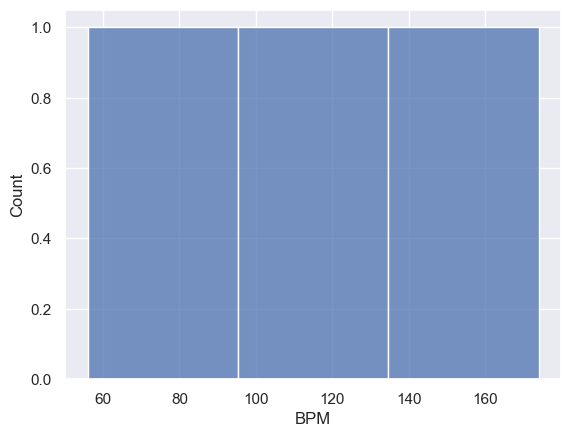

In [20]:
plot_bpm_dist('Gospel')

Потому что мало людей, которые слушают такой жанр

Посмотрим как распределяется BPM в более популярных жанрах

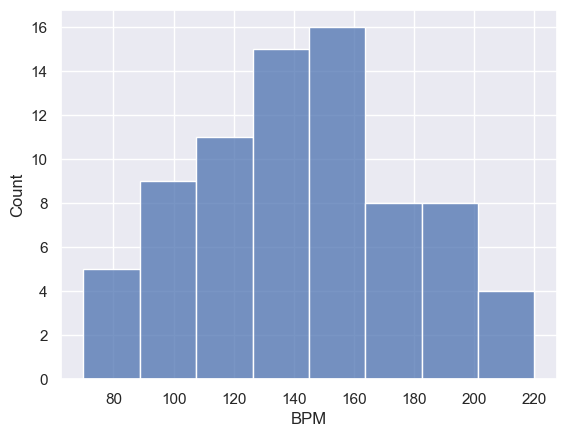

In [21]:
plot_bpm_dist('Metal')

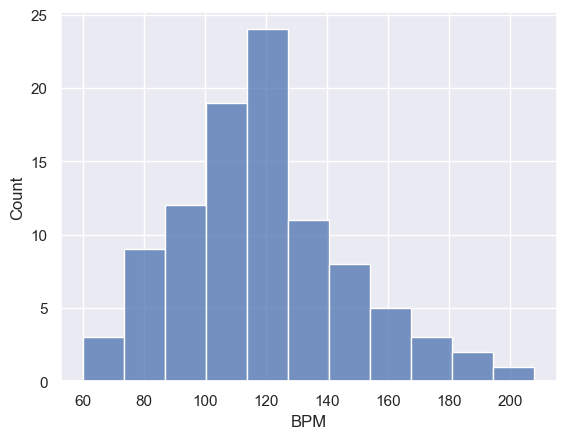

In [22]:
plot_bpm_dist('Pop')

Это похоже на нормальное распределение

Вывод: можем заменить BPM на среднее по жанру

### Восстановим na в BPM по любимому жанру

In [23]:
df_tmp = df_clear.copy()

In [24]:
genre_mean_bpm = df_clear.groupby('Fav genre')['BPM'].mean()
genre_mean_bpm

Fav genre
Classical           114.575000
Country             110.190476
EDM                 133.885714
Folk                113.920000
Gospel              116.333333
Hip hop             111.906250
Jazz                124.473684
K pop               128.560000
Latin               133.666667
Lofi                114.300000
Metal               142.763158
Pop                 118.907216
R&B                 117.965517
Rap                 127.100000
Rock                124.052980
Video game music    119.750000
Name: BPM, dtype: float64

In [25]:
for ind, row in df_tmp[df_tmp['BPM'].isna()].iterrows():
    genre = row['Fav genre']
    mean_bpm = genre_mean_bpm[genre]
    df_tmp.loc[ind, 'BPM'] = mean_bpm

In [26]:
na_count = df_tmp.isna().sum(axis=0)
na_count = na_count[na_count > 0]
na_count

Age                          1
Primary streaming service    1
Music effects                8
dtype: int64

In [27]:
df_clear = df_tmp

### Откинем оставшиеся nan

In [28]:
df_clear.dropna(axis=0, inplace=True)

### Конвертируем некоторые столбцы в int

In [29]:
int_cols = ['Age', 'Hours per day', 'BPM',
            'Anxiety', 'Depression', 'Insomnia',
            'OCD']

for col in int_cols:
    df_clear[col] = df_clear[col].astype('int')

### Переименуем Video Game

In [30]:
df_tmp = df_clear.copy()


In [31]:
df_tmp

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18,Spotify,4,False,False,False,Video game music,False,True,132,...,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
3,61,YouTube Music,2,True,False,True,Jazz,True,True,84,...,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
4,18,Spotify,4,True,False,False,R&B,True,False,107,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve
5,18,Spotify,5,True,True,True,Jazz,True,True,86,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve
6,18,YouTube Music,3,True,True,False,Video game music,True,True,66,...,Rarely,Rarely,Never,Never,Sometimes,4,8,6,0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17,Spotify,2,True,True,False,Rock,True,True,120,...,Very frequently,Never,Rarely,Very frequently,Never,7,6,0,9,Improve
732,18,Spotify,1,True,True,False,Pop,True,True,160,...,Very frequently,Never,Never,Sometimes,Sometimes,3,2,2,5,Improve
733,19,Other streaming service,6,True,False,True,Rap,True,False,120,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2,2,2,2,Improve
734,19,Spotify,5,True,True,False,Classical,False,False,170,...,Never,Never,Never,Never,Sometimes,2,3,2,1,Improve


In [32]:
df_tmp['Fav genre'] = df_tmp['Fav genre'].replace({'Video game music': 'VG music'})

In [33]:
df_tmp.rename({'Frequency [Video game music]': 'Frequency [VG music]'}, inplace=True)

In [34]:
df_clear = df_tmp

### Итог

In [35]:
df_clear

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18,Spotify,4,False,False,False,VG music,False,True,132,...,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
3,61,YouTube Music,2,True,False,True,Jazz,True,True,84,...,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
4,18,Spotify,4,True,False,False,R&B,True,False,107,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve
5,18,Spotify,5,True,True,True,Jazz,True,True,86,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve
6,18,YouTube Music,3,True,True,False,VG music,True,True,66,...,Rarely,Rarely,Never,Never,Sometimes,4,8,6,0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17,Spotify,2,True,True,False,Rock,True,True,120,...,Very frequently,Never,Rarely,Very frequently,Never,7,6,0,9,Improve
732,18,Spotify,1,True,True,False,Pop,True,True,160,...,Very frequently,Never,Never,Sometimes,Sometimes,3,2,2,5,Improve
733,19,Other streaming service,6,True,False,True,Rap,True,False,120,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2,2,2,2,Improve
734,19,Spotify,5,True,True,False,Classical,False,False,170,...,Never,Never,Never,Never,Sometimes,2,3,2,1,Improve


## Добавим столбцы

### Добавим категориальный столбец для mental problems

In [36]:
df_tmp = df_clear.copy()

In [37]:

for problem in ['Anxiety', 'Depression', 'Insomnia', 'OCD']:

    mask_label = [(df_tmp[problem] <= 3, 'Low'),
                  ((df_tmp[problem] >= 4) & (df_tmp[problem] <= 7), 'Medium'),
                  (df_tmp[problem] > 7, 'High')]
    column_name = f'{problem}_category'
    for mask, label in mask_label:
        df_tmp.loc[mask, f'{problem}_category'] = label
    df_tmp[column_name] = pd.Categorical(df_tmp[column_name], categories=['Low', 'Medium', 'High'], ordered=True)       
        
df_tmp

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Anxiety_category,Depression_category,Insomnia_category,OCD_category
2,18,Spotify,4,False,False,False,VG music,False,True,132,...,Very frequently,7,7,10,2,No effect,Medium,Medium,High,Low
3,61,YouTube Music,2,True,False,True,Jazz,True,True,84,...,Never,9,7,3,3,Improve,High,Medium,Low,Low
4,18,Spotify,4,True,False,False,R&B,True,False,107,...,Rarely,7,2,5,9,Improve,Medium,Low,Medium,High
5,18,Spotify,5,True,True,True,Jazz,True,True,86,...,Never,8,8,7,7,Improve,High,High,Medium,Medium
6,18,YouTube Music,3,True,True,False,VG music,True,True,66,...,Sometimes,4,8,6,0,Improve,Medium,High,Medium,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17,Spotify,2,True,True,False,Rock,True,True,120,...,Never,7,6,0,9,Improve,Medium,Medium,Low,High
732,18,Spotify,1,True,True,False,Pop,True,True,160,...,Sometimes,3,2,2,5,Improve,Low,Low,Low,Medium
733,19,Other streaming service,6,True,False,True,Rap,True,False,120,...,Rarely,2,2,2,2,Improve,Low,Low,Low,Low
734,19,Spotify,5,True,True,False,Classical,False,False,170,...,Sometimes,2,3,2,1,Improve,Low,Low,Low,Low


In [38]:
df_clear = df_tmp

### Musician

In [39]:
mask = df_clear['Composer'] | df_clear['Instrumentalist']
df_clear.loc[mask, 'Musician'] = True
df_clear.loc[~mask, 'Musician'] = False

## Разведывательный анализ данных

### Общие сведения

In [40]:
df_clear.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,726.000000,726.000000,726.000000,726.00000,726.000000,726.000000,726.000000
mean,25.148760,3.559229,123.373278,5.84022,4.800275,3.747934,2.632231
std,11.935224,3.069079,29.984958,2.78604,3.025875,3.093234,2.836901
min,10.000000,0.000000,20.000000,0.00000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,105.000000,4.00000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,120.000000,6.00000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,140.000000,8.00000,7.000000,6.000000,4.000000
max,89.000000,24.000000,220.000000,10.00000,10.000000,10.000000,10.000000


### Кто участвовал в опросе

#### Распределение по возрасту

<Axes: xlabel='Age', ylabel='Count'>

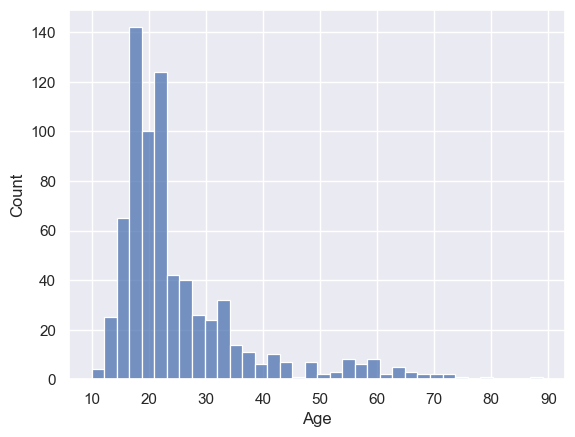

In [41]:
sns.histplot(data=df_clear, x='Age')

В основном подростки и люди до 30

#### Распределение по стриминовым сервисам

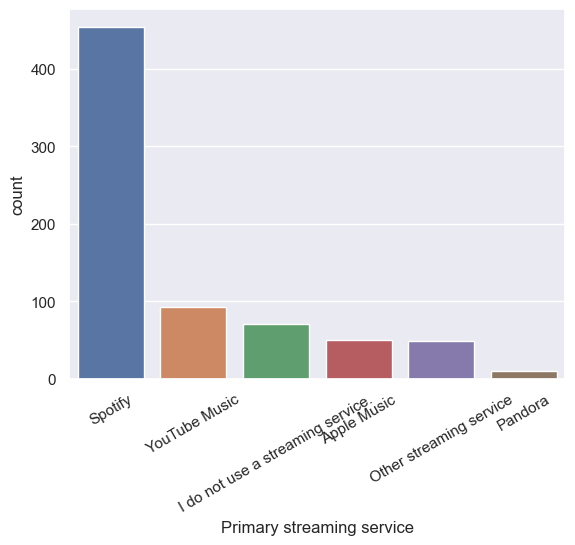

In [42]:
sns.countplot(data=df_clear, x='Primary streaming service')
plt.xticks(rotation = 30);

#### Распределение ментальных проблем

<Axes: xlabel='problem', ylabel='measure'>

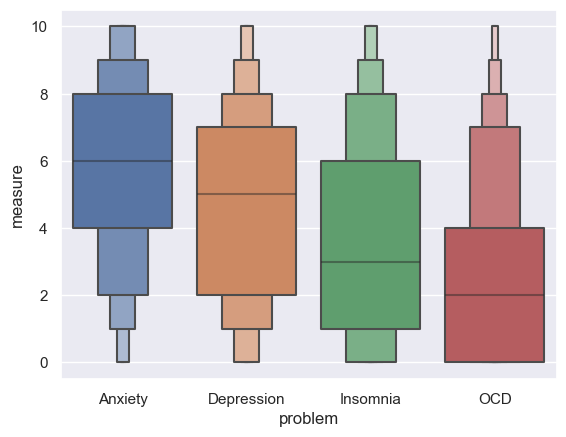

In [43]:

cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
dfs = []
for col in cols:
    vals = df_clear[col]
    df = pd.DataFrame({'measure': vals, 'problem': col})
    dfs.append(df)
problems_df = pd.concat(dfs)
sns.boxenplot(data=problems_df, x='problem', y='measure')

Видим, что большинство людей страдают от Anxiety и Depression. Осатльные проблемы мене выражены

#### Распределение по любимым жанрам

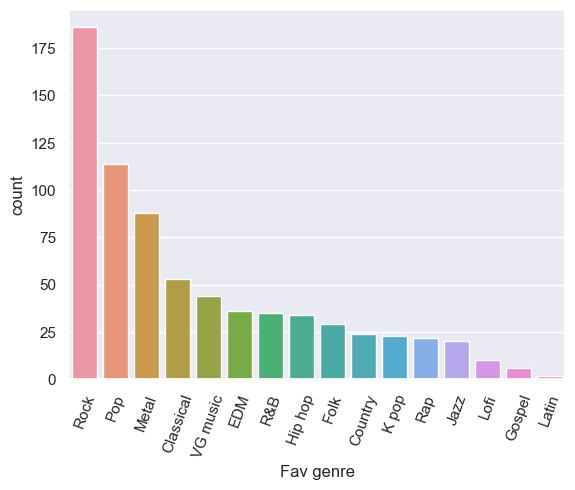

In [44]:
sns.countplot(data=df_clear, x='Fav genre',
              order=df_clear['Fav genre'].value_counts().index)
plt.xticks(rotation = 70);

Аномально мало фанатов рэпа и Hip hop

#### Распределение по BPM

<Axes: xlabel='BPM', ylabel='Count'>

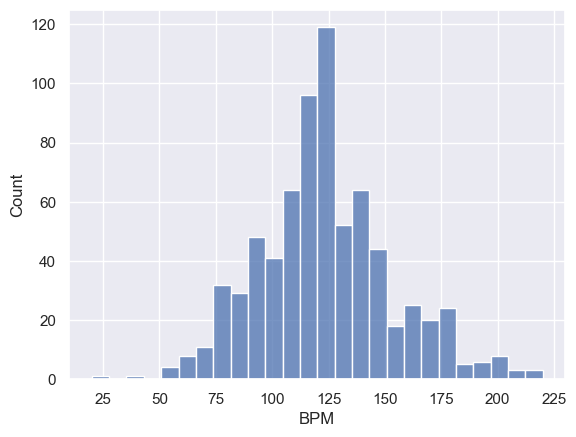

In [45]:
sns.histplot(data=df_clear, x='BPM')

#### Распределение по времени прослушивания

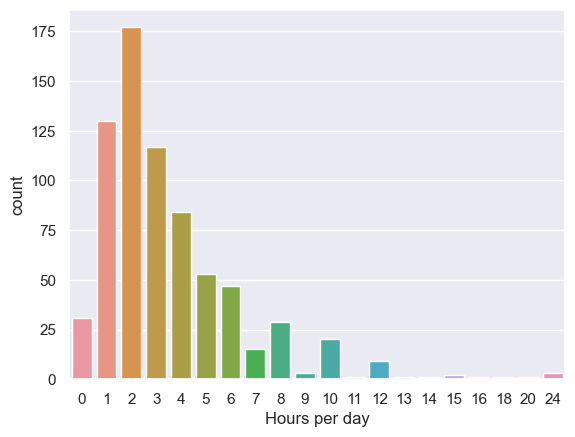

<Axes: xlabel='Hours per day', ylabel='count'>

In [46]:
sns.countplot(data=df_clear, x='Hours per day')

Не заядлые меломаны. Слушают умеренно музыку

### Соотносим 2 переменные

#### scatterplot bpm и mental problems

Вопрос: Есть ли корреляция между скоростью музыки и проблемами?

Дальнейшее исследование:
* Влияют ли только экстремальные значения bpm?
* Жанр-bpm-mental health
* Влияние bpm на соотношение while working и problems
* Приводит ли высокий bpm в бессоннице?

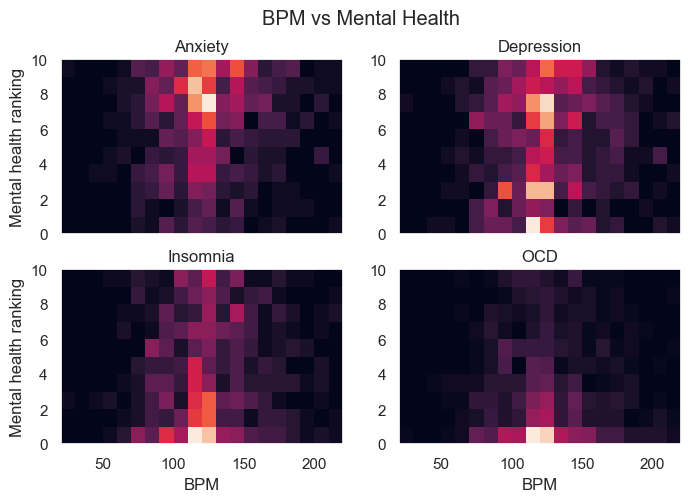

In [47]:
fig = plt.figure(figsize=(8, 5))

plt.suptitle("BPM vs Mental Health")

y = df_clear["Anxiety"]
y2 = df_clear["Depression"]
y3 = df_clear["Insomnia"]
y4 = df_clear["OCD"]
x = df_clear["BPM"]

fig.add_subplot(221)
plt.title('Anxiety')
plt.xticks([])
plt.ylabel('Mental health ranking')
plt.hist2d(x,y, density = True, bins=[20, 10])


fig.add_subplot(222)
plt.title('Depression')
plt.xticks([])
plt.hist2d(x,y2, density = True, bins=[20, 10]);

fig.add_subplot(223)
plt.title('Insomnia')
plt.ylabel('Mental health ranking')
plt.xlabel('BPM')
plt.hist2d(x,y3, density = True, bins=[20, 10]);

fig.add_subplot(224)
plt.title('OCD')
plt.xlabel('BPM')
plt.hist2d(x,y4, density = True, bins=[20, 10]);

Может показать, что чаще всего тревожность испытывают люди, слушающие средний BPM, но это ложь. Людей, слушающих средний bpm больше, поэтому и наибольшее количество людей с тревожностью.

Как улучшить график?

Понять отличаются ли чем-то выборки bpm для различных уровней тревожности.
Сделать

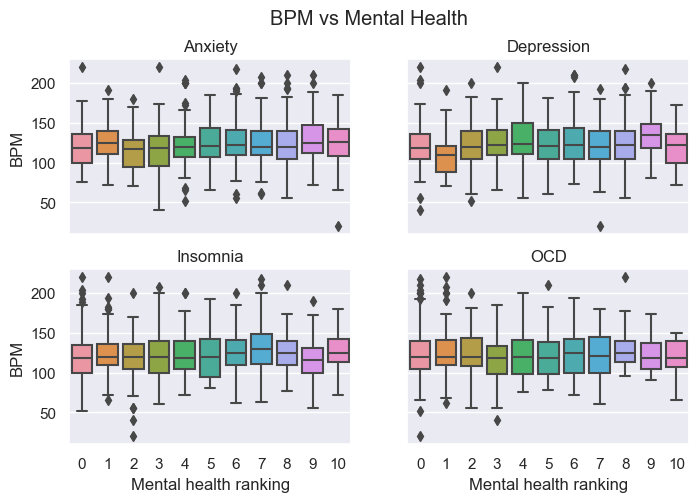

In [48]:
fig, axis = plt.subplots(2, 2, figsize=(8, 5), sharex='all', sharey='all')



plt.suptitle("BPM vs Mental Health")

y = df_clear["Anxiety"]
y2 = df_clear["Depression"]
y3 = df_clear["Insomnia"]
y4 = df_clear["OCD"]
x = df_clear["BPM"]

ax = axis[0, 0]
sns.boxplot(data=df_clear, x='Anxiety', y='BPM', ax=ax)
ax.set_title('Anxiety')
ax.set_xticks([])
ax.set_ylabel('BPM')
ax.set_xlabel('')


ax = axis[0, 1]
sns.boxplot(data=df_clear, x='Depression', y='BPM', ax=ax)
ax.set_title('Depression')
ax.set_xticks([])
ax.set_xlabel('')
ax.set_ylabel('')

ax = axis[1, 0]
sns.boxplot(data=df_clear, x='Insomnia', y='BPM', ax=ax)
ax.set_title('Insomnia')
ax.set_ylabel('BPM')
ax.set_xlabel('Mental health ranking')


ax = axis[1, 1]
sns.boxplot(data=df_clear, x='OCD', y='BPM', ax=ax)
ax.set_title('OCD')
ax.set_xlabel('Mental health ranking')
ax.set_ylabel('');

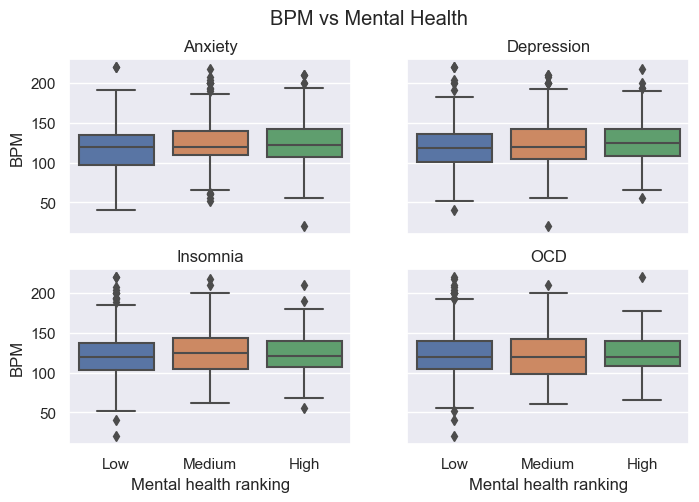

In [49]:
fig, axis = plt.subplots(2, 2, figsize=(8, 5), sharex='all', sharey='all')



plt.suptitle("BPM vs Mental Health")


ax = axis[0, 0]
sns.boxplot(data=df_clear, x='Anxiety_category', y='BPM', ax=ax, order=['Low', 'Medium', 'High'])
ax.set_title('Anxiety')
ax.set_xticks([])
ax.set_ylabel('BPM')
ax.set_xlabel('')


ax = axis[0, 1]
sns.boxplot(data=df_clear, x='Depression_category', y='BPM', ax=ax, order=['Low', 'Medium', 'High'])
ax.set_title('Depression')
ax.set_xticks([])
ax.set_xlabel('')
ax.set_ylabel('')

ax = axis[1, 0]
sns.boxplot(data=df_clear, x='Insomnia_category', y='BPM', ax=ax, order=['Low', 'Medium', 'High'])
ax.set_title('Insomnia')
ax.set_ylabel('BPM')
ax.set_xlabel('Mental health ranking')


ax = axis[1, 1]
sns.boxplot(data=df_clear, x='OCD_category', y='BPM', ax=ax, order=['Low', 'Medium', 'High'])
ax.set_title('OCD')
ax.set_xlabel('Mental health ranking')
ax.set_ylabel('');

Вывод: первичных взаимосвязей между BPM и ментальным заболеваниями не выявлено

Что делать дальше:
* Могут ли комбинации проблема давать более высокий BPM

#### Music effects и mental health

Цель: понять, склонны ли люди с Improve к более простым проблемам. Worsen к более серьезным проблемам. Как отличаются проблемы у выборок?

<Axes: xlabel='Music effects', ylabel='count'>

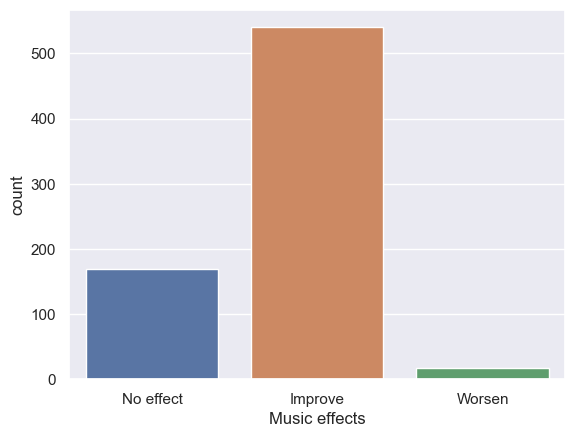

In [50]:
sns.countplot(data=df_clear, x='Music effects')

<Axes: xlabel='Music effects', ylabel='OCD'>

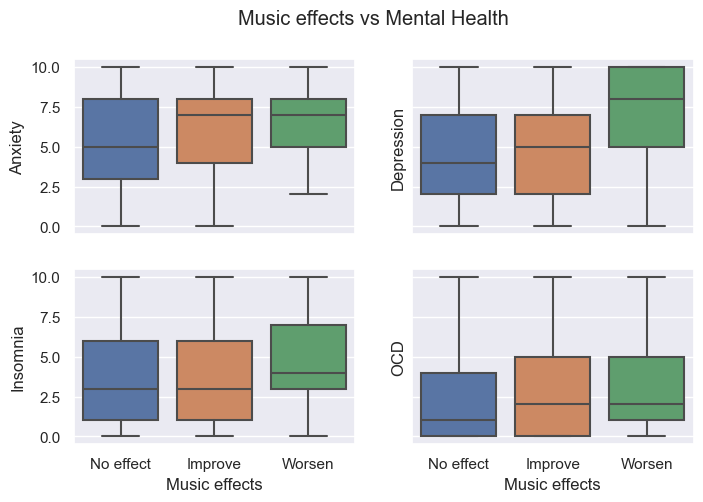

In [51]:
fig, axis = plt.subplots(2, 2, figsize=(8, 5), sharex='all', sharey='all')

plt.suptitle("Music effects vs Mental Health")

ax = axis[0, 0]
sns.boxplot(data=df_clear, x='Music effects', y='Anxiety', ax=ax)
ax.set_xlabel('')

ax = axis[0, 1]
sns.boxplot(data=df_clear, x='Music effects', y='Depression', ax=ax)
ax.set_xlabel('')

ax = axis[1, 0]
sns.boxplot(data=df_clear, x='Music effects', y='Insomnia', ax=ax)


ax = axis[1, 1]
sns.boxplot(data=df_clear, x='Music effects', y='OCD', ax=ax)


Вывод: 
* Можно ранжировать (No effect, Improve, Worsen) по степени влияния на ментальное здоровье
* Распределение проблем с бессонницей одинаково у No effect и Improve


Дальнейшие исследования:
* Влияние эффекта музыки на длительность прослушивание
* Какие жанры коррелируют с worsen

#### hours per day и mental problems

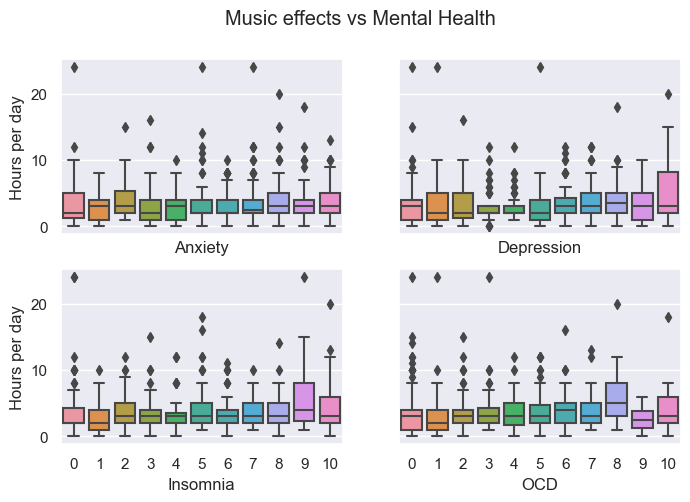

In [52]:
fig, axis = plt.subplots(2, 2, figsize=(8, 5), sharex='all', sharey='all')

plt.suptitle("Music effects vs Mental Health")



ax = axis[0, 0]
sns.boxplot(data=df_clear, x='Anxiety', y='Hours per day', ax=ax)

ax = axis[0, 1]
sns.boxplot(data=df_clear, x='Depression', y='Hours per day', ax=ax)
ax.set_ylabel('')

ax = axis[1, 0]
sns.boxplot(data=df_clear, x='Insomnia', y='Hours per day', ax=ax)


ax = axis[1, 1]
sns.boxplot(data=df_clear, x='OCD', y='Hours per day', ax=ax)
ax.set_ylabel('');


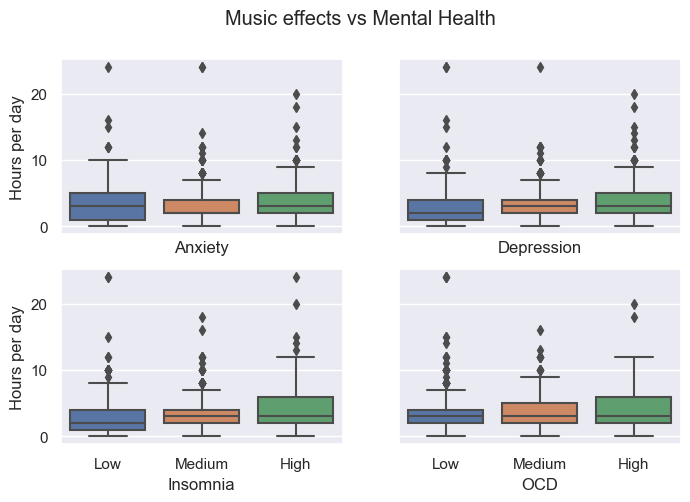

In [53]:
fig, axis = plt.subplots(2, 2, figsize=(8, 5), sharey='all', sharex='all')

plt.suptitle("Music effects vs Mental Health")



ax = axis[0, 0]
sns.boxplot(data=df_clear, x='Anxiety_category', y='Hours per day', ax=ax, order=['Low', 'Medium', 'High'])
ax.set_xlabel('Anxiety')

ax = axis[0, 1]
sns.boxplot(data=df_clear, x='Depression_category', y='Hours per day', ax=ax, order=['Low', 'Medium', 'High'])
ax.set_ylabel('')
ax.set_xlabel('Depression')

ax = axis[1, 0]
sns.boxplot(data=df_clear, x='Insomnia_category', y='Hours per day', ax=ax, order=['Low', 'Medium', 'High'])
ax.set_xlabel('Insomnia')


ax = axis[1, 1]
sns.boxplot(data=df_clear, x='OCD_category', y='Hours per day', ax=ax, order=['Low', 'Medium', 'High'])
ax.set_ylabel('')
ax.set_xlabel('OCD');


Вывод: количество прослушивания музыки практически не влияет на степень ментальных проблем

Дальнейшие исследования:
* Комбинация Hours per day и BPM
* Комбинация Hours per day и жанр музыки
* Как Hours per day зависит от возраста

#### BoxPlot Время прослушивания для Instrumentalist и Composer

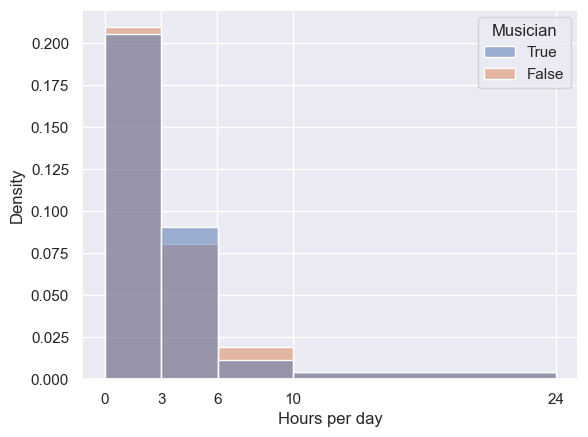

In [54]:
sns.histplot(data=df_clear, x='Hours per day', hue='Musician', bins=[0, 3.01, 6.01, 10, 24], stat='density', common_norm=False, hue_order=[True, False])

plt.xticks([0, 3, 6, 10, 24]);

Вывод: Люди, занимающиеся музыкой, практически так же часто слушают музыку, как и остальные

Дальнейшие исследования: как улучшить этот график?

#### BoxPlot Genre и MentalHealthProblems

In [55]:
def plot_problem_genre_boxpolot(ax, problem_col):
    # cound median and get order of FavGenre by median
    medians = df_clear.groupby('Fav genre')[problem_col].median()
    order = medians.sort_values(ascending=False).index
    
    sns.boxplot(data=df_clear, x='Fav genre', y=problem_col,
                order=order, hue='Fav genre', dodge=False,
                ax=ax)
    # remove legend
    ax.get_legend().remove()
    # count obs_number for each  Fav Genre
    obs_number_series = df_clear['Fav genre'].value_counts()
    # Display text
    for ind ,label_text in enumerate(ax.get_xticklabels()):
        label = label_text.get_text()
        median = medians[label]
        obs_number = obs_number_series[label]
        text = f'n: {obs_number}'
        ax.text(ind,
                median + 0.03,
                text,
                horizontalalignment='center',
                size='small',
                color='black',
                weight='semibold')

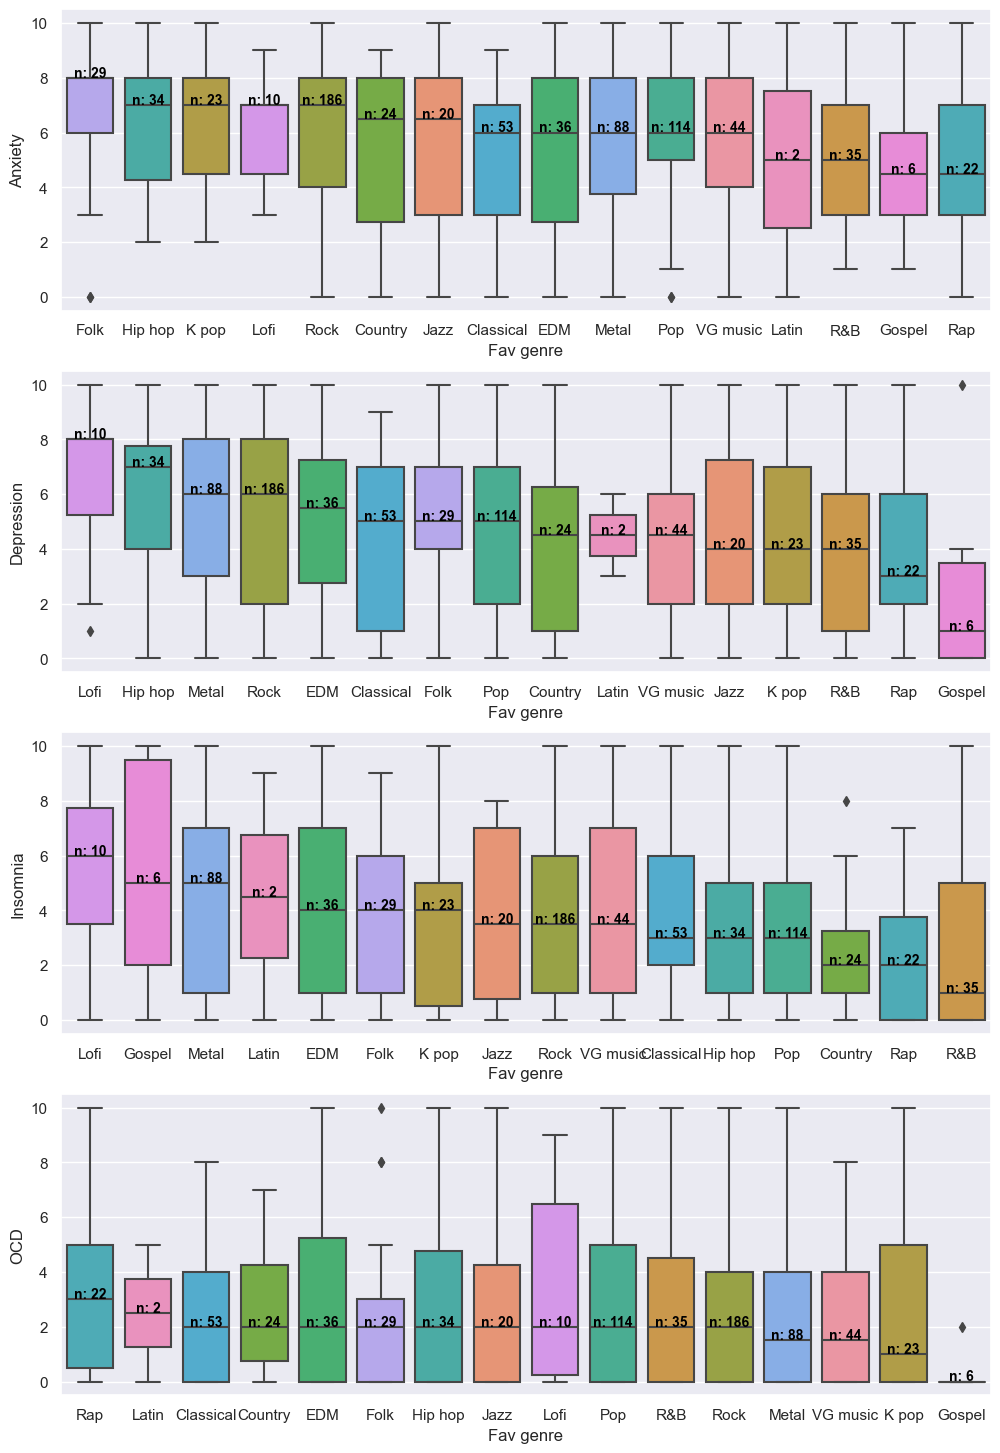

In [56]:
fig, ax = plt.subplots(4, 1, figsize=(12, 18))
plot_problem_genre_boxpolot(ax[0], 'Anxiety')
plot_problem_genre_boxpolot(ax[1], 'Depression')
plot_problem_genre_boxpolot(ax[2], 'Insomnia')
plot_problem_genre_boxpolot(ax[3], 'OCD')

Выводы:
* Folk сильно связан с anxiety
* Lofi с anxiety и depression при этом всего 10 наблюдений
* Hip-hop высока depression и anxiety
* Metal депрессивный жанр

Исследование:
* Проверить Folk, Anxiety, Hip-hop по частоте прослушивания
* Дейстивительно ли металисты больше склонны к depression чем к anxiety

#### WhileWorking и жанры

Какие жанры чаще всего слушают, пока работает?

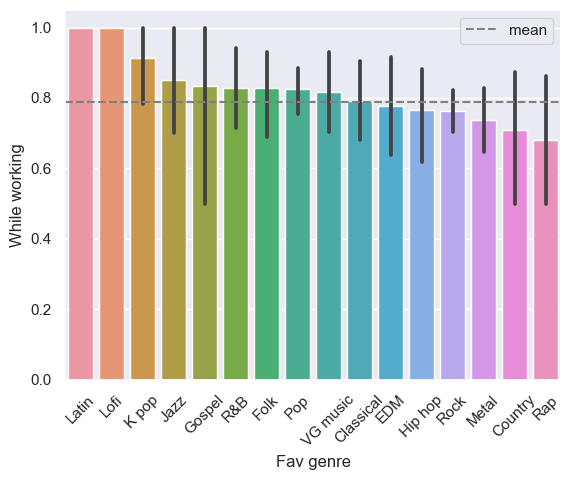

In [57]:
while_working_percent = df_clear.groupby('Fav genre')['While working'].mean()
order = while_working_percent.sort_values(ascending=False).index
sns.barplot(data=df_clear, x='Fav genre', y='While working', order=order)
plt.xticks(rotation=45)

mean = df_clear['While working'].mean()
plt.axhline(y=mean, label='mean', linestyle='--', color='gray')
plt.legend();

In [58]:
def bernulli_confedence_interval(mean, n, t):
    lower = mean - t/(2*np.sqrt(n))
    lower = max(0, lower)
    upper = mean + t/(2*np.sqrt(n))
    upper = min(1, upper)
    return lower, upper

In [59]:
alpha = 0.05
norm = stats.norm()
t = norm.ppf(1 - alpha/2)

# группируем 
group = df_clear.groupby('Fav genre')['While working']
aggr = group.aggregate(['mean', 'count'])
def add_coinfedence(row):
    lower, upper = bernulli_confedence_interval(
        row['mean'],
        row['count'],
        t
    )
    row['lower'] = lower
    row['upper'] = upper
    return row

aggr = aggr.apply(add_coinfedence, axis=1)
aggr

,mean,count,lower,upper
Fav genre,,,,
Classical,0.792453,53.0,0.657842,0.927064
Country,0.708333,24.0,0.508295,0.908371
EDM,0.777778,36.0,0.614447,0.941108
Folk,0.827586,29.0,0.645608,1.000000
Gospel,0.833333,6.0,0.433257,1.000000
Hip hop,0.764706,34.0,0.596640,0.932771
Jazz,0.850000,20.0,0.630869,1.000000
K pop,0.913043,23.0,0.708703,1.000000
Latin,1.000000,2.0,0.307048,1.000000


## Проверяем гипотезы

### Дейстивтельно ли folk - тревожный жанр

In [60]:
df_clear

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Anxiety,Depression,Insomnia,OCD,Music effects,Anxiety_category,Depression_category,Insomnia_category,OCD_category,Musician
2,18,Spotify,4,False,False,False,VG music,False,True,132,...,7,7,10,2,No effect,Medium,Medium,High,Low,False
3,61,YouTube Music,2,True,False,True,Jazz,True,True,84,...,9,7,3,3,Improve,High,Medium,Low,Low,True
4,18,Spotify,4,True,False,False,R&B,True,False,107,...,7,2,5,9,Improve,Medium,Low,Medium,High,False
5,18,Spotify,5,True,True,True,Jazz,True,True,86,...,8,8,7,7,Improve,High,High,Medium,Medium,True
6,18,YouTube Music,3,True,True,False,VG music,True,True,66,...,4,8,6,0,Improve,Medium,High,Medium,Low,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17,Spotify,2,True,True,False,Rock,True,True,120,...,7,6,0,9,Improve,Medium,Medium,Low,High,True
732,18,Spotify,1,True,True,False,Pop,True,True,160,...,3,2,2,5,Improve,Low,Low,Low,Medium,True
733,19,Other streaming service,6,True,False,True,Rap,True,False,120,...,2,2,2,2,Improve,Low,Low,Low,Low,True
734,19,Spotify,5,True,True,False,Classical,False,False,170,...,2,3,2,1,Improve,Low,Low,Low,Low,True


<Axes: xlabel='Frequency [Folk]', ylabel='Anxiety'>

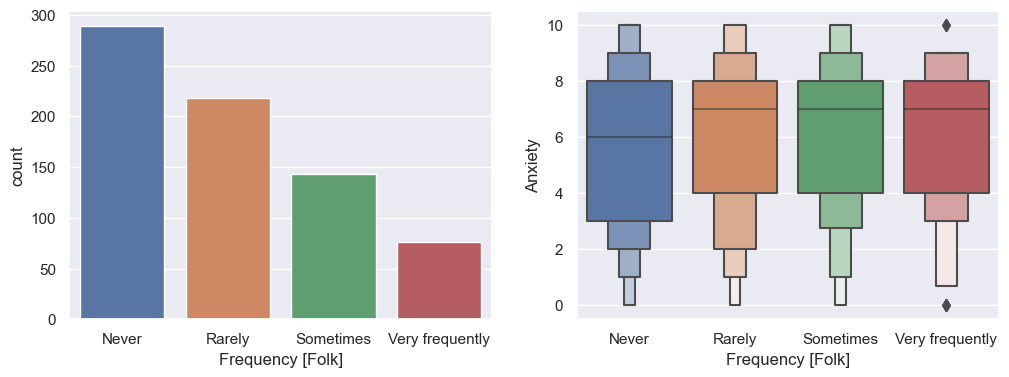

In [61]:
fig, axis = plt.subplots(1,2, figsize=(12, 4))

sns.countplot(data=df_clear, x='Frequency [Folk]', ax=axis[0])
sns.boxenplot(data=df_clear, x='Frequency [Folk]', y='Anxiety', ax=axis[1])

### Lofi и связь с депрессией

<Axes: xlabel='Frequency [Lofi]', ylabel='Depression'>

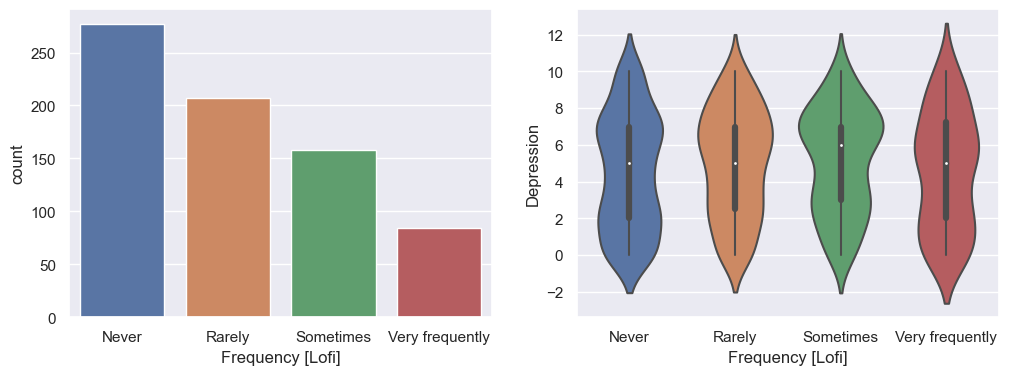

In [62]:
fig, axis = plt.subplots(1,2, figsize=(12, 4))

order = ['Never', 'Rarely', 'Sometimes', 'Very frequently']
sns.countplot(data=df_clear, x='Frequency [Lofi]', ax=axis[0], order=order)
sns.violinplot(data=df_clear, x='Frequency [Lofi]', y='Depression', ax=axis[1], order=order)

### Metal более дерпессивный чем тревожный

Подготовим данные для визуализации

In [63]:
df_tmp = pd.DataFrame(columns=['Frequency [Metal]', 'Disorder_type', 'Magnitude'])
rows = len(df_clear)

def get_df(problem):
    df = df_clear[['Frequency [Metal]', problem]].copy()
    df.rename({problem: 'Magnitude'}, axis=1, inplace=True)
    df['Disorder_type'] = problem
    return df
df1 = get_df('Anxiety')
df2 = get_df('Depression')
df_tmp = pd.concat([df_tmp, df1, df2], axis=0)
df_tmp['Magnitude'] = df_tmp['Magnitude'].astype(int)
df_tmp

,Frequency [Metal],Disorder_type,Magnitude
2,Sometimes,Anxiety,7
3,Never,Anxiety,9
4,Never,Anxiety,7
5,Rarely,Anxiety,8
6,Rarely,Anxiety,4
...,...,...,...
731,Rarely,Depression,6
732,Never,Depression,2
733,Rarely,Depression,2
734,Never,Depression,3


In [64]:
df_tmp['Disorder_type'].nunique()

2

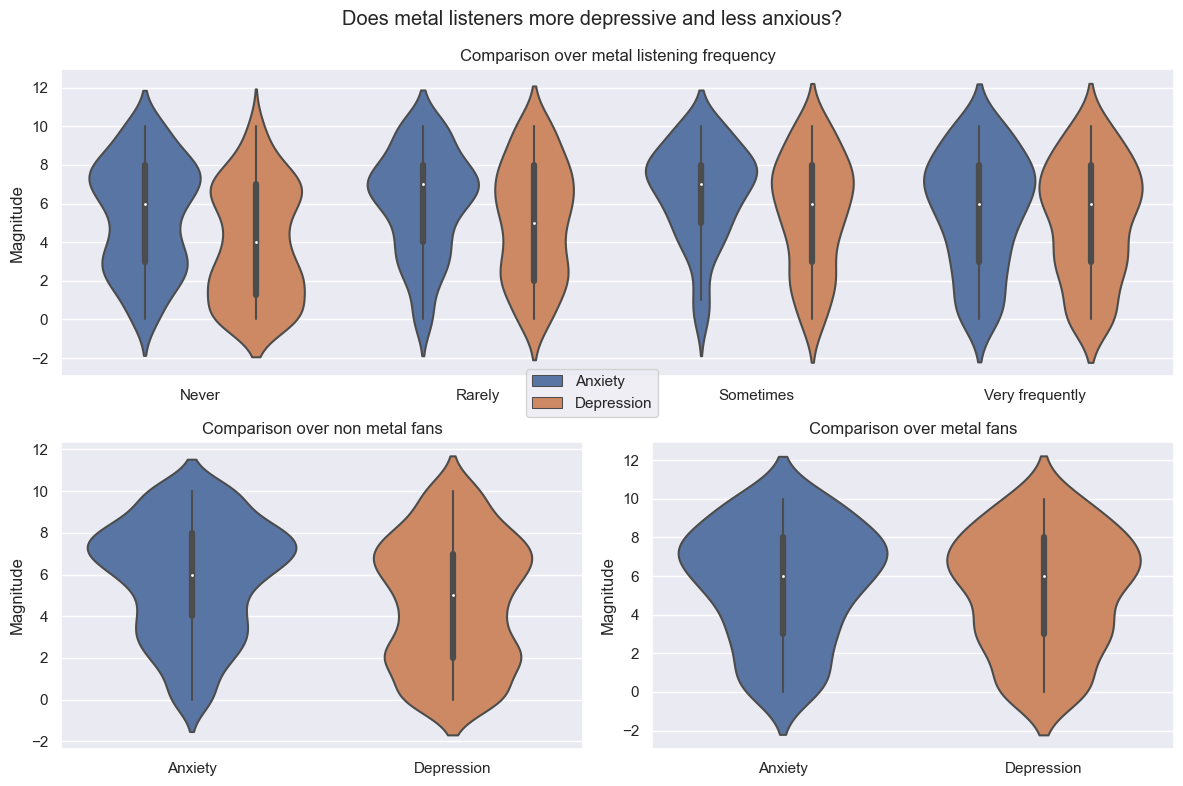

In [65]:


fig, axis = plt.subplots(2, 2, figsize=(12, 8)) 
grid = axis[0, 0].get_gridspec()
for ax in axis.ravel():
    ax.remove()


# add figure title
fig.suptitle('Does metal listeners more depressive and less anxious?')

# frequency plot
ax0 = fig.add_subplot(grid[0, :])
order = ['Never', 'Rarely', 'Sometimes', 'Very frequently']
sns.violinplot(data=df_tmp, x='Frequency [Metal]', y='Magnitude', hue='Disorder_type', ax=ax0, order=order)
ax0.set_title('Comparison over metal listening frequency')
ax0.get_legend().remove()
ax0.set_xlabel('')

handles, labels = ax0.get_legend_handles_labels()
fig.legend(handles, labels, loc='center')

# over all people
ax10 = fig.add_subplot(grid[1, 0])
mask = df_tmp['Frequency [Metal]'] == 'Very frequently'
sns.violinplot(data=df_tmp[~mask], x='Disorder_type', y='Magnitude', ax=ax10)
ax10.set_title('Comparison over non metal fans')
ax10.set_xlabel('')


# over metal fans
ax11 = fig.add_subplot(grid[1, 1])
sns.violinplot(data=df_tmp[mask], x='Disorder_type', y='Magnitude', ax=ax11)
ax11.set_title('Comparison over metal fans')
ax11.set_xlabel('')

fig.tight_layout()

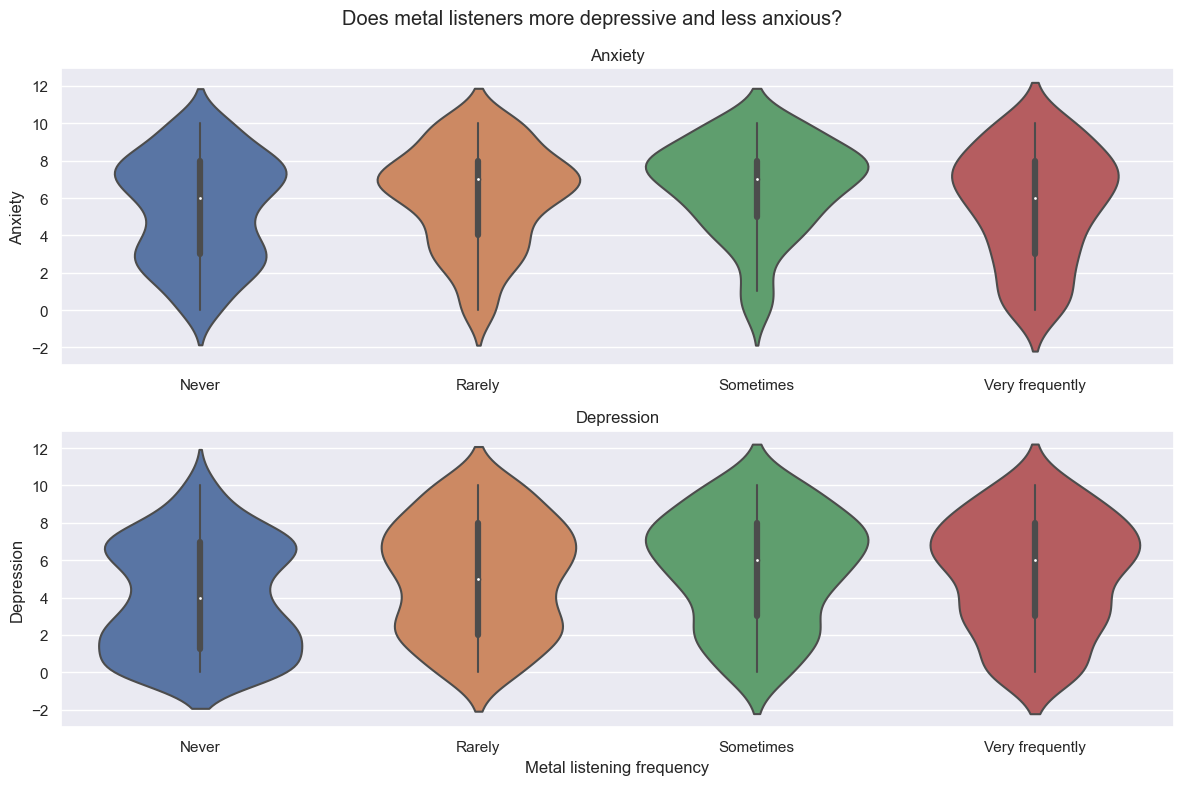

In [68]:
fig, axis = plt.subplots(2, 1, figsize=(12, 8), sharey='all')



# add figure title
fig.suptitle('Does metal listeners more depressive and less anxious?')

order = ['Never', 'Rarely', 'Sometimes', 'Very frequently']
# frequency plot
ax = axis[0]
sns.violinplot(data=df_clear, x='Frequency [Metal]', y='Anxiety', ax=ax, order=order)
ax.set_title('Anxiety')
ax.set_xlabel('')

ax = axis[1]
sns.violinplot(data=df_clear, x='Frequency [Metal]', y='Depression', ax=ax, order=order)
ax.set_title('Depression')

ax.set_xlabel('Metal listening frequency')

fig.tight_layout()

<Axes: xlabel='Anxiety_category', ylabel='Density'>

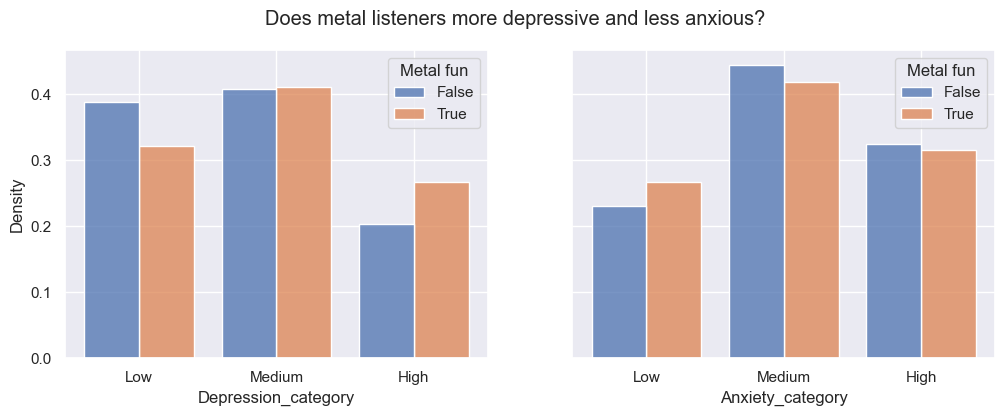

In [69]:
df_metal = df_clear[['Anxiety_category', 'Depression_category', 'Frequency [Metal]']].copy()
df_metal['Metal fun'] = None
mask = df_clear['Frequency [Metal]'] == 'Very frequently'
df_metal.loc[mask, 'Metal fun'] = True
df_metal.loc[~mask, 'Metal fun'] = False
df_metal

fig, axis = plt.subplots(1, 2, figsize=(12, 4), sharey='all')

fig.suptitle('Does metal listeners more depressive and less anxious?')

ax = axis[0]
sns.histplot(data=df_metal, x='Depression_category', hue='Metal fun', multiple='dodge', 
             shrink=0.8, stat='density', common_norm=False, ax=ax)

ax = axis[1]
sns.histplot(data=df_metal, x='Anxiety_category', hue='Metal fun', multiple='dodge',
             shrink=0.8, stat='density', common_norm=False, ax=ax)

Вывод: категориальные и непрерывные графики говорят, что фанаты металла более депрессивны чем остальные люди. Тревожность на таком же уровне